In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

In [3]:
# TODO: load in dataset
songs = pd.read_csv('../data/music_embeds.csv')

# TODO: view first few columns
songs.head()

,filename,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,...,dim_760,dim_761,dim_762,dim_763,dim_764,dim_765,dim_766,dim_767,song,genre
0,A Fan's Mail,-0.004854,-0.014205,-0.004760,-0.006950,0.000537,0.001243,-0.013726,0.000464,-0.006346,...,-0.003038,-0.008058,-0.006683,-0.001391,-0.011345,-0.002085,-0.004069,-0.017774,A Fan's Mail,funk
1,Abracadabra,-0.009634,-0.014021,-0.001026,-0.005184,-0.000343,0.000106,0.001932,-0.003759,-0.008788,...,-0.007019,-0.006988,-0.013948,-0.000976,-0.013896,-0.012256,0.008407,-0.011757,Abracadabra,pop
2,Aguas De Marco,0.001255,-0.017850,-0.013220,-0.004844,-0.004731,-0.008914,0.005198,-0.000873,-0.010008,...,0.000567,-0.015456,-0.005778,-0.003446,-0.016408,-0.015601,0.005135,-0.005079,Aguas De Marco,bossa nova
3,Another Time,-0.005455,-0.010048,-0.012848,0.015155,0.006223,0.003988,-0.007696,-0.000192,0.002167,...,-0.005628,-0.020266,-0.005505,-0.007672,-0.020972,-0.005813,-0.000709,-0.005729,Another Time,hip hop
4,Belong to the World,-0.003881,-0.003831,-0.004683,-0.017928,0.001103,0.005035,0.002506,-0.005794,-0.015744,...,-0.003443,0.002318,-0.010466,-0.018116,-0.008590,-0.010983,-0.009556,-0.004235,Belong to the World,hip hop


In [4]:
songs.shape

(61, 771)

In [5]:
# TODO: select your predictive columns
X = songs.drop(columns=['filename','song','genre'])

# TODO: select your song-name column for later manipulation
song_names = songs['song']

# TODO: select your genre column for later manipulation
genres = songs['genre']

In [6]:
# TODO: Using PCA, decompose your embeddings into 4 components for easy visualization
pca = PCA(n_components=4)

# TODO: fit & transform your predictors
X_pca = pca.fit_transform(X)

# TODO: view your PCA components
print("PCA transformed data:", X_pca.shape)
print("Explained variance ratio for each component:", pca.explained_variance_ratio_)


PCA transformed data: (61, 4)
Explained variance ratio for each component: [0.27220876 0.17232414 0.09344634 0.04277885]


In [7]:


cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance

array([0.27220876, 0.4445329 , 0.53797924, 0.58075809])

In [8]:
# TODO: transform your X_pca variable into a dataframe
pca_df = pd.DataFrame(X_pca, columns =["PC1","PC2","PC3","PC4"])

# TODO: merge your pca components, song name, and genre together into one dataframe (be sure to merge on the index)
merged_df1 = pd.concat([pca_df,song_names,genres],axis=1)

# TODO: view the first 5 rows of your merged df
merged_df1.head()

,PC1,PC2,PC3,PC4,song,genre
0,0.084061,-0.077482,-0.063781,-0.062150,A Fan's Mail,funk
1,0.332044,-0.154053,-0.060291,0.151893,Abracadabra,pop
2,-0.011686,0.194544,-0.046370,0.046978,Aguas De Marco,bossa nova
3,0.009237,-0.109553,-0.111190,-0.089895,Another Time,hip hop
4,0.308582,-0.040624,-0.119071,0.149659,Belong to the World,hip hop


### Q1 

How are songs distributed (if a distributione exists) in the principal‐component dimensions by genre?

[Answer Here]

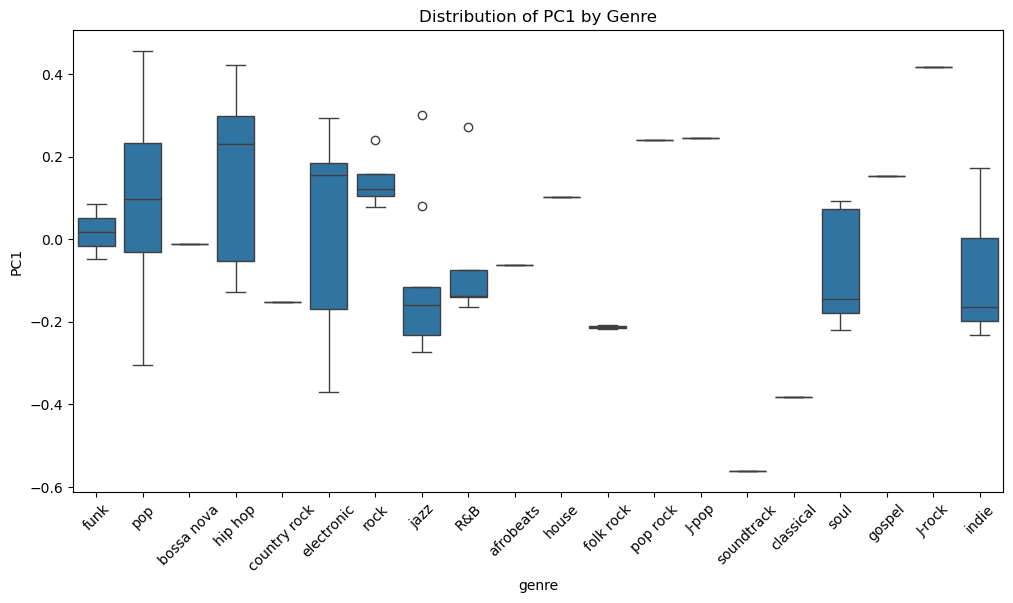

In [9]:
# Box plot with pc1 
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='PC1', data=merged_df1)
plt.title("Distribution of PC1 by Genre")
plt.xticks(rotation=45)
plt.show()

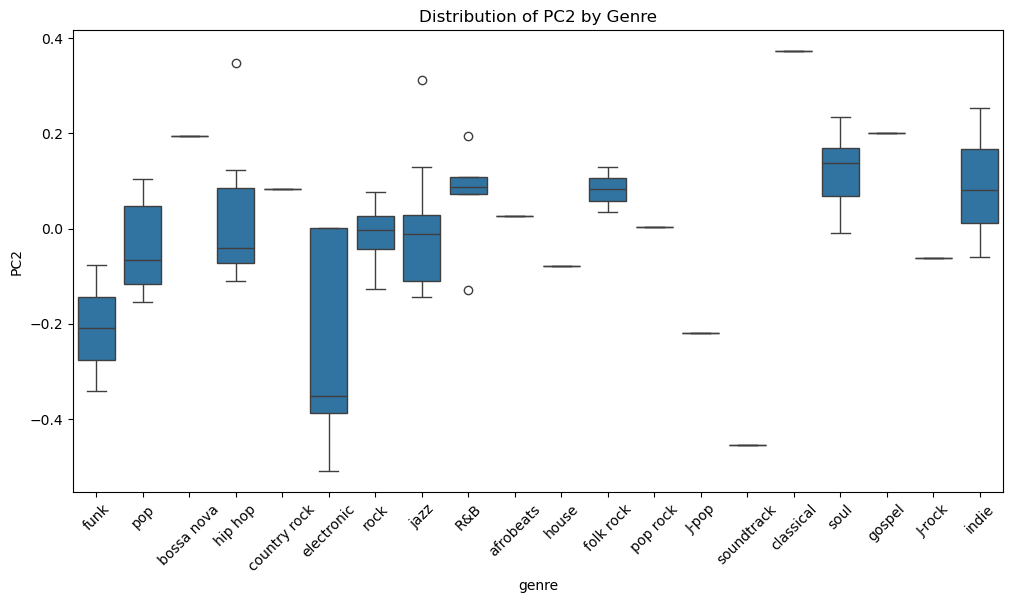

In [10]:
# box plot with pc2

plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='PC2', data=merged_df1)
plt.title("Distribution of PC2 by Genre")
plt.xticks(rotation=45)
plt.show()

no specific patterns are shown

### Scatter Plot (top 5 genre)

In [ ]:
# taking top 5 genre 
top_5_genres = merged_df1['genre'].value_counts().head().index

In [12]:
top_5_genres

Index(['jazz', 'pop', 'soul', 'hip hop', 'electronic'], dtype='object', name='genre')

In [13]:
# dataframe with top 5 genre
df2 = merged_df1[merged_df1['genre'].isin(top_5_genres)]

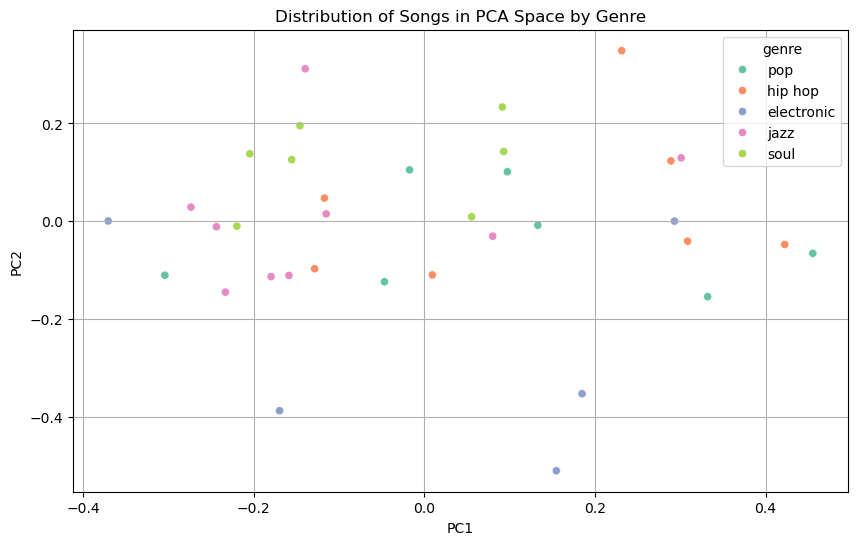

In [14]:
# scatter plot to find clustering
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(data=df2,x='PC1', y='PC2', hue='genre', palette='Set2')
plt.title("Distribution of Songs in PCA Space by Genre")
plt.grid(True)
plt.show()

The resulting scatter plot shows no strong clustering of songs by genre. Instead, we observe considerable overlap across genres, indicating that the first two PCs do not capture distinct genre-specific patterns.

### Q2 

Which genre shows the highest (and lowest) average value on PC1?


In [15]:
avg_pc1 = merged_df1.groupby('genre')['PC1'].mean()
avg_pc1 

genre
J-pop           0.245477
J-rock          0.418004
R&B            -0.048509
afrobeats      -0.062836
bossa nova     -0.011686
classical      -0.381851
country rock   -0.153262
electronic      0.018459
folk rock      -0.212748
funk            0.017554
gospel          0.152434
hip hop         0.144965
house           0.102962
indie          -0.074438
jazz           -0.106960
pop             0.092756
pop rock        0.239750
rock            0.140357
soul           -0.069437
soundtrack     -0.561815
Name: PC1, dtype: float64

In [16]:
# Highest average pc1
avg_pc1.max()

0.4180035973101627

J-rock  shows the highest average value on PC1

In [17]:
# lowest average pc1
avg_pc1.min()

-0.5618146399100402

soundtrack shows the lowest average value on PC1

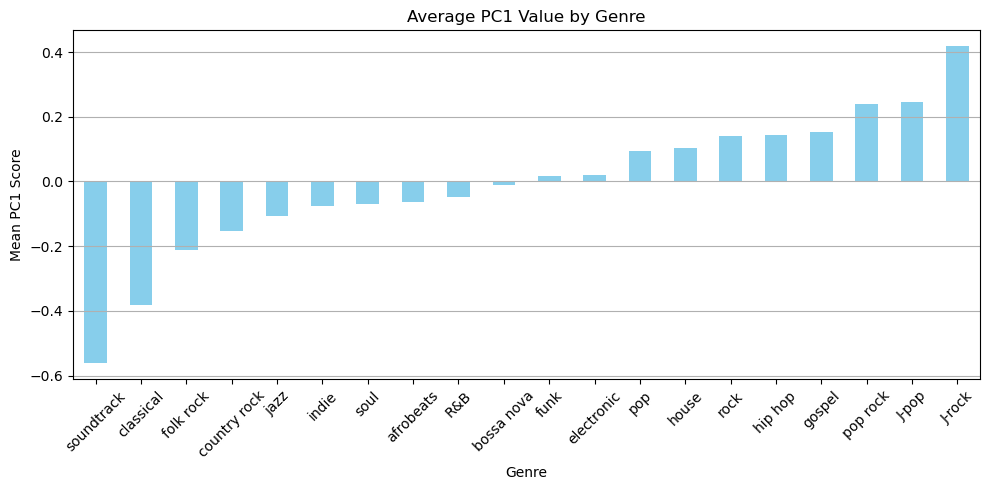

In [18]:
import matplotlib.pyplot as plt

pc1_means = avg_pc1.sort_values()

# Plot
pc1_means.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title("Average PC1 Value by Genre")
plt.ylabel("Mean PC1 Score")
plt.xlabel("Genre")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Q3 

Do any genres exhibit particularly wide dispersion along PC3?

[Answer Here]

In [26]:
merged_df1.groupby('genre')['PC3'].std().sort_values(ascending=False)

genre
folk rock       0.244874
indie           0.162088
R&B             0.155437
rock            0.132760
pop             0.124569
jazz            0.124308
soul            0.121778
hip hop         0.087351
electronic      0.081164
funk            0.047493
J-pop                NaN
J-rock               NaN
afrobeats            NaN
bossa nova           NaN
classical            NaN
country rock         NaN
gospel               NaN
house                NaN
pop rock             NaN
soundtrack           NaN
Name: PC3, dtype: float64

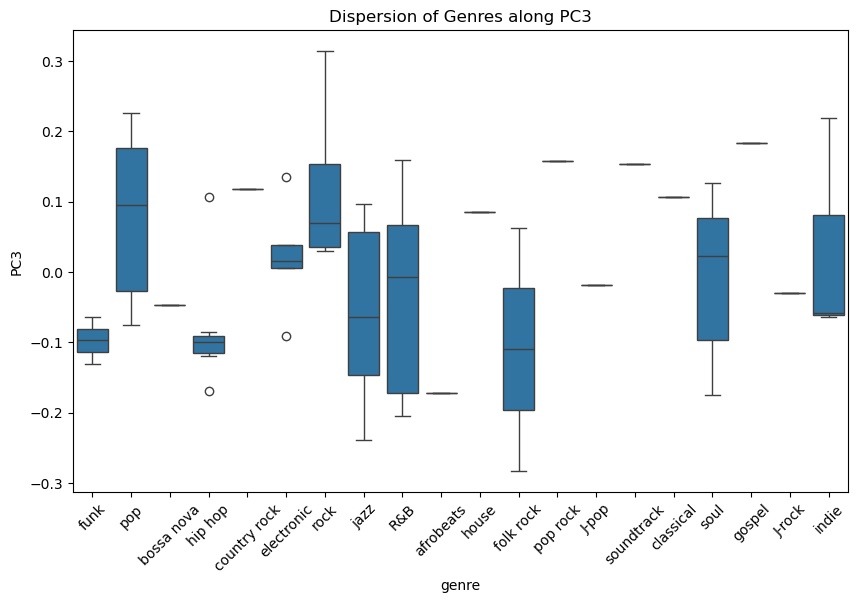

In [ ]:
#plotting

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(data=merged_df1, x='genre', y='PC3')
plt.xticks(rotation=45)
plt.title('Dispersion of Genres along PC3')
plt.show()

folk rock shows highest dispersion -  0.244874

### Q4

Are any pairs of PCA components strongly correlated?

[Answer Here]

In [27]:
# to find correlation 

merged_df1[['PC1', 'PC2', 'PC3']].corr()

,PC1,PC2,PC3
PC1,1.000000e+00,-8.824961e-17,1.502685e-17
PC2,-8.824961e-17,1.000000e+00,-6.488293e-18
PC3,1.502685e-17,-6.488293e-18,1.000000e+00


No pairs of PCA components are strongly correlated. 